<a href="https://colab.research.google.com/github/rohan-singh987/DeepLearning/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

### Importing mnist data directly from keras wich is already test-train splitted

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train.shape

(60000, 28, 28)

We can clearly see that, here we have 3D data (60000, 28, 28) of which
- 60,000 is image data
- 28 X 28 numpy Array

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

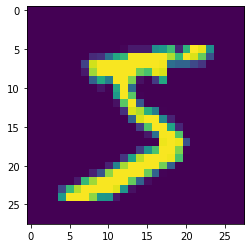

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

We have values from 0 to 255 which is very unsimilar and that is not good for our neural networks, so we have to preprocess whole data to get values under similar range
As we now Max_Value of dataset is 255 and Min_value is 0.
we can use Normalization technique to make data range btwn (0,1)

In [12]:
from sklearn.preprocessing import normalize
X_train_scaled = normalize(X_train, norm='l1') 

ValueError: ignored

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
from numpy.ma.core import shape
model = Sequential()

# Our Rows are in 2D data we cant use them directly so first we have to make them in 1D array using keras function 'Flatten'
model.add(Flatten(input_shape = (28,28)))

In [18]:
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

1st layer = 28*28 = 784(input values) * 128(node) + 128(bias) = 100480    
2nd layer = 128*10+10 = 1290

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = 'Adam', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=10, validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2873 - accuracy: 0.9180 - val_loss: 0.1572 - val_accuracy: 0.9569
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1294 - accuracy: 0.9615 - val_loss: 0.1162 - val_accuracy: 0.9664
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0885 - accuracy: 0.9739 - val_loss: 0.1094 - val_accuracy: 0.9679
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0658 - accuracy: 0.9807 - val_loss: 0.0969 - val_accuracy: 0.9722
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0518 - accuracy: 0.9843 - val_loss: 0.0984 - val_accuracy: 0.9718
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0403 - accuracy: 0.9881 - val_loss: 0.0913 - val_accuracy: 0.9742
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0953 - val_accuracy:

In [24]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [25]:
y_prob

array([[2.80431744e-09, 2.88034388e-11, 5.00801667e-09, ...,
        9.99998629e-01, 4.97157260e-10, 1.53105873e-07],
       [5.87235425e-12, 1.06230358e-08, 9.99999940e-01, ...,
        2.38884583e-17, 5.83995963e-09, 1.50196160e-16],
       [8.80311234e-07, 9.99206841e-01, 9.51740949e-05, ...,
        4.14521433e-04, 2.72706035e-04, 1.73296300e-07],
       ...,
       [4.30653024e-17, 2.23246524e-13, 2.82915759e-15, ...,
        2.31422936e-10, 6.81965318e-11, 1.04153905e-05],
       [1.37797990e-13, 1.89957112e-15, 6.32052478e-17, ...,
        2.28539084e-13, 4.06384393e-09, 4.15103769e-16],
       [5.20284822e-11, 8.77285301e-21, 2.47393729e-12, ...,
        5.05231066e-16, 1.71419682e-14, 1.88706405e-13]], dtype=float32)

In [26]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [27]:
y_pred = y_prob.argmax(axis=1)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.9768